<a href="https://colab.research.google.com/github/nazbeh/I_C_M_E_2020/blob/master/Workshop3/KerasWalkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Example

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Load MNIST dataset

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

W0815 22:53:17.969494 140387323258752 deprecation.py:323] From <ipython-input-2-8bf8ae5a5303>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0815 22:53:17.971000 140387323258752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0815 22:53:17.972117 140387323258752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0815 22:53:18.316921 140387323258752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0815 22:53:18.319169 140387323258752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0815 22:53:18.407554 140387323258752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [ ]:
mnist.validation.images.shape

(5000, 784)

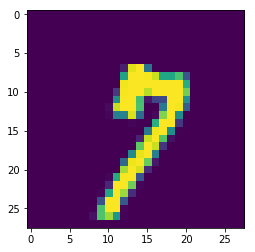

In [ ]:
plt.imshow( mnist.train.images[57].reshape(28,28) )

In [ ]:
mnist.train.labels.shape

(55000, 10)

## Build and train a Sequential Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [ ]:
model = Sequential([
    Dense(25, input_shape=(784,)),
    Activation('relu'),
    Dense(25, input_shape=(25,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

W0815 22:53:18.977545 140387323258752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0815 22:53:18.979926 140387323258752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0815 22:53:18.990008 140387323258752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [ ]:
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics =["accuracy"])

W0815 22:53:19.034170 140387323258752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0815 22:53:19.061662 140387323258752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [ ]:
model.fit(mnist.train.images,mnist.train.labels,batch_size=32);

W0815 22:53:19.191088 140387323258752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0815 22:53:19.365556 140387323258752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/1
55000/55000 [==============================] - 8s 153us/step - loss: 0.8510 - acc: 0.7615


In [ ]:
model.evaluate(mnist.validation.images,mnist.validation.labels)

5000/5000 [==============================] - 0s 47us/step


[0.37969296522140505, 0.892]

## Plot losses

Using the package https://github.com/stared/livelossplot

Install using the command `pip install livelossplot`

In [ ]:
!pip install livelossplot

In [ ]:
!ls

MNIST_data  sample_data


In [ ]:
from livelossplot.keras import PlotLossesCallback

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics =["accuracy"])
model.optimizer.lr = 0.01

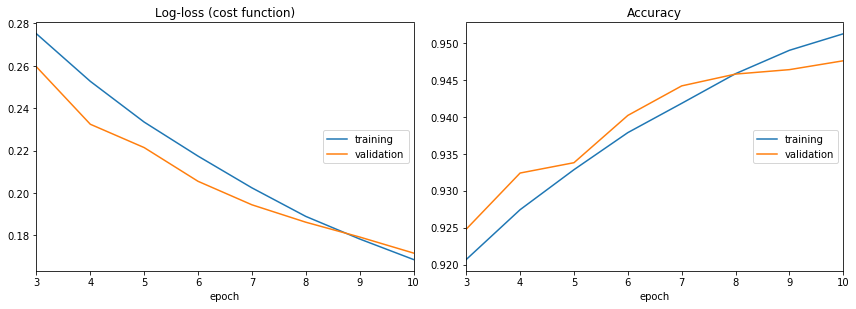

Log-loss (cost function):
training   (min:    0.169, max:    0.356, cur:    0.169)
validation (min:    0.172, max:    0.307, cur:    0.172)

Accuracy:
training   (min:    0.897, max:    0.951, cur:    0.951)
validation (min:    0.911, max:    0.948, cur:    0.948)


In [ ]:
model.fit(mnist.train.images,mnist.train.labels, 
          validation_data=[mnist.validation.images,mnist.validation.labels],
          callbacks = [PlotLossesCallback()],
          epochs=10,
          batch_size=32
         );

In [ ]:
model.evaluate(mnist.test.images,mnist.test.labels)

10000/10000 [==============================] - 0s 40us/step


[0.17371114611774682, 0.9492]

## Plot Weights

In [ ]:
def plot_grid(grid_array,nrows = 16,ncols = 32):
    '''
    Plots a list of images on a grid
    
    Arguments
        grid_array - numpy array of shape (1,h,w,numimgs)
        nrows,ncols - the number of rows and cols in the grid, they
                    should multiply to numimgs
    Output
        displays a large plot of the images on a grid
    '''
    init_shape = grid_array.shape

    assert( nrows*ncols == init_shape[3])
    assert( 1 == init_shape[0])

    grid_image = (grid_array.reshape(init_shape[1],init_shape[2],init_shape[3]).transpose(2,0,1)
     .reshape(nrows,ncols,init_shape[1],init_shape[2]).swapaxes(1,2)
               .reshape(nrows*init_shape[1],ncols*init_shape[2]))

    plt.figure(figsize=(20,20))
    plt.imshow(grid_image)

In [ ]:
W1,b1,W2,b2, W3,b3 = model.get_weights()

In [ ]:
W1.reshape(1,28,28,-1).shape

(1, 28, 28, 25)

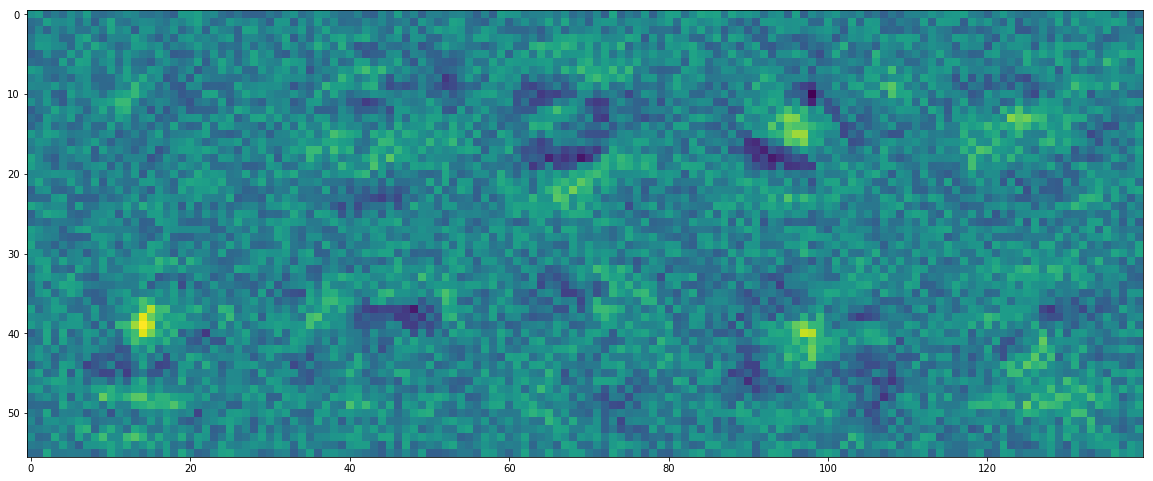

In [ ]:
plot_grid(W1[:,:10].reshape(1,28,28,-1), 2,5)

## Convolutional Neural Network for MNIST

In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D,Reshape,Flatten

In [ ]:
model = Sequential([
    Reshape(input_shape=(784,),target_shape=(28,28,1)),
    Conv2D(32,activation="relu",kernel_size=(5,5),strides=(1,1),padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64,activation="relu",kernel_size=(5,5),strides=(1,1),padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(128,activation="relu",kernel_size=(5,5),strides=(1,1),padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics =["accuracy"])

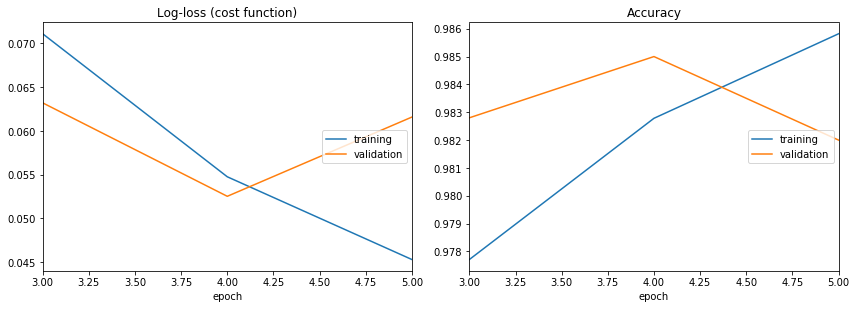

Log-loss (cost function):
training   (min:    0.045, max:    0.493, cur:    0.045)
validation (min:    0.053, max:    0.112, cur:    0.062)

Accuracy:
training   (min:    0.858, max:    0.986, cur:    0.986)
validation (min:    0.967, max:    0.985, cur:    0.982)


In [ ]:
model.fit(mnist.train.images,mnist.train.labels, 
          validation_data=[mnist.validation.images,mnist.validation.labels],
          callbacks = [PlotLossesCallback()],
          epochs=5,
          batch_size=32
         );